In [1]:
# This necessary library used in data science 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data analytic -20220106T192432Z-001/data analytic/salary1.csv")
df

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1114,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1028,1116,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1029,1117,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
1030,1118,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1


In [3]:
df.isnull().sum()

Unnamed: 0        0
age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

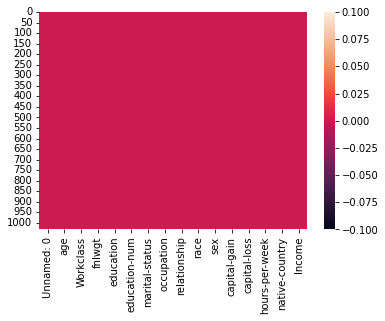

In [4]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
# Now delete the unwanted columns from the dataset
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1028,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1029,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
1030,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1


In [8]:
# Label Encoding
# Split the data in to the catagorical and numerical datatypes
df_cat = df.select_dtypes(object)
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [9]:
df_num = df.select_dtypes(["int64","float64"])
df_num

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
1027,34,290763,9,0,0,40,0
1028,36,51100,10,0,0,40,0
1029,41,227644,9,0,0,50,0
1030,58,205267,13,0,0,40,1


In [10]:
# Importing the LabelEncoder class and make the object of it.
from sklearn.preprocessing import LabelEncoder

In [11]:
# Here, all the catagorical data is converted into the numerical dataype.
for col in df_cat:
    # Create the object of LabelEncoder Class
    le = LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Workclass       1032 non-null   int64
 1   education       1032 non-null   int64
 2   marital-status  1032 non-null   int64
 3   occupation      1032 non-null   int64
 4   relationship    1032 non-null   int64
 5   race            1032 non-null   int64
 6   sex             1032 non-null   int64
 7   native-country  1032 non-null   int64
dtypes: int64(8)
memory usage: 64.6 KB


In [12]:
# Now concate the both dataframe df_cat and df_num in df_new
df_new = pd.concat([df_cat,df_num],axis = 1)
df_new.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,5,9,4,0,1,4,1,28,39,77516,13,2174,0,40,0
1,4,9,2,3,0,4,1,28,50,83311,13,0,0,13,0
2,2,11,0,5,1,4,1,28,38,215646,9,0,0,40,0
3,2,1,2,5,0,2,1,28,53,234721,7,0,0,40,0
4,2,9,2,9,5,2,0,4,28,338409,13,0,0,40,0


**Here, the data is imbalance from the above graph presenting the target value.**
    
    
    So, here we use the Sampling technique for balancing the data.

In [13]:
#First install imblearn  inbuilt package of python but not installed in juypter notebook
#we install the package imblearn  for sampling technique
#!pip install imblearn

In [14]:
# Selecting the Input and Output data
X = df_new.drop("Income",axis=1) # Input or Independent variable
Y = df_new["Income"]   # Output or target variable

In [15]:
# Now train test split the input and output.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

**Standardization**

In [16]:
# Only on Input columns if we performing the sampling technique, 
# but we performing the LinearRegression then apply on both input and output
from sklearn.preprocessing import StandardScaler



# fit_transform on training data X_train and transform on testing data X_test
# Create object of StandardScaler Class
ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test) # here not training operation wouldn't perform, its only for testing
print("After Scaling training data : ")
print(X_train)
print("After scaling tesring data : ")
print(X_test)

After Scaling training data : 
[[-0.24904966 -0.93217405 -0.37685422 ... -0.24796148 -0.2300775
  -0.10196177]
 [-0.24904966  0.17523798  0.95691415 ...  1.38249871 -0.2300775
   0.77130512]
 [-0.24904966 -0.37846803  0.95691415 ... -0.24796148 -0.2300775
  -1.84849555]
 ...
 [-1.2824626  -0.65532104 -1.71062259 ... -0.24796148 -0.2300775
   1.29526525]
 [ 1.81777623  0.17523798  0.95691415 ... -0.24796148 -0.2300775
   0.07269161]
 [ 1.81777623  0.17523798 -0.37685422 ... -0.24796148 -0.2300775
  -0.10196177]]
After scaling tesring data : 
[[ 1.81777623  1.28265001 -0.37685422 ... -0.24796148 -0.2300775
   0.33467167]
 [-0.24904966 -2.59329209 -0.37685422 ... -0.24796148 -0.2300775
  -0.10196177]
 [-0.24904966  1.00579701 -0.37685422 ... -0.24796148  5.61984356
  -0.10196177]
 ...
 [-0.24904966  1.28265001 -0.37685422 ... -0.24796148 -0.2300775
   0.77130512]
 [-0.24904966  0.17523798 -1.71062259 ... -0.24796148 -0.2300775
  -0.10196177]
 [ 1.81777623  0.17523798  0.95691415 ... -0.24

In [20]:
# Create the Baseline Model  : Logistic Regression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)
from sklearn.linear_model import LogisticRegression

In [18]:
# Create the function
def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  print("Classification Report : ")
  print(classification_report(Y_test,Y_pred))
  print("Confusion Matrix: ")
  print(confusion_matrix(Y_test,Y_pred))
  return model

In [21]:
# Create the object for LogisticRegression class
lr = LogisticRegression()

In [22]:
# Call the function
lr = create_model(lr)

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       238
           1       0.72      0.40      0.52        72

    accuracy                           0.83       310
   macro avg       0.78      0.68      0.71       310
weighted avg       0.81      0.83      0.81       310

Confusion Matrix: 
[[227  11]
 [ 43  29]]


In [23]:
df["Income"].value_counts()

0    778
1    254
Name: Income, dtype: int64

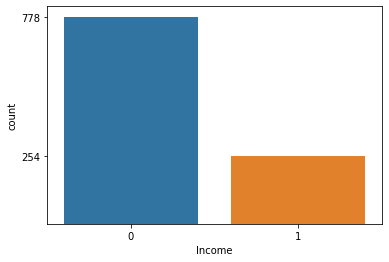

In [24]:
sns.countplot(data=df,x="Income")
c=df["Income"].value_counts()
plt.yticks(c)
plt.show()

data is not balance.


1.   If you have basicall reducing the majority class that is known as Random Undersampling.
2.   If you are increasing the minority class that is 
known as Random over sampling.




In [25]:
# First install imblearn and importing package of randomover and randomunder sampling package
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

**Random Over Sampling**

In [26]:
# Use the RandomOverSampling 
# Create the object of RandomOverSampling class 
ros = RandomOverSampler()

In [27]:
# Train the data through the RandomOverSampling method = fit_resample() inbuilt of RandomOverSampler
X_train1,Y_train1 = ros.fit_resample(X_train,Y_train)  # Increasing the " yes" record as  Duplicate values

In [28]:
# Before applying the RandomOverSampler() on training data
pd.Series(Y_train).value_counts()

0    540
1    182
Name: Income, dtype: int64

In [30]:
# After applying the RandomOverSampler on training data
pd.Series(Y_train1).value_counts()

1    540
0    540
Name: Income, dtype: int64

In [31]:
# Test the data through the RandomOverSampler method = fit_resample() inbuilt of RandomOverSampler
X_test1, Y_test1 = ros.fit_resample(X_test,Y_test)

In [33]:
#Before applying the RandomOverSampler() on testing data
pd.Series(Y_test).value_counts()

0    238
1     72
Name: Income, dtype: int64

In [34]:
# After applying RandomOverSampler() on testing data
pd.Series(Y_train1).value_counts()

1    540
0    540
Name: Income, dtype: int64

In [35]:
# Now create the function on new training and testing data
def create_model1(model):
  model.fit(X_train1,Y_train1)
  Y_pred1 = model.predict(X_test1)
  print("ClassificationReport : ")
  print(classification_report(Y_test1,Y_pred1))
  print("ConfusionMatrix : " )
  print(confusion_matrix(Y_test1,Y_pred1))
  return model

In [36]:
# Again create the Baseline model of Logistic Regression
lr1 = LogisticRegression()

In [37]:
# Call the function 
lr1 = create_model1(lr1)

ClassificationReport : 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       238
           1       0.77      0.76      0.77       238

    accuracy                           0.77       476
   macro avg       0.77      0.77      0.77       476
weighted avg       0.77      0.77      0.77       476

ConfusionMatrix : 
[[183  55]
 [ 56 182]]


**Random Under Sampling**

In [38]:
# Use the RandomUnderSampler()
# Create the object of RandomUnderSampler()
rus = RandomUnderSampler()

In [39]:
# Train the data using the RandomUnderSampler() fit_resample() method which inubilt function
X_train2, Y_train2 = rus.fit_resample(X_train,Y_train)

In [41]:
# Before the applying the RandomUnderSampler() on training data
pd.Series(Y_train).value_counts()

0    540
1    182
Name: Income, dtype: int64

In [42]:
# After applying the RandomUnderSampler() on training data
pd.Series(Y_train2).value_counts()

1    182
0    182
Name: Income, dtype: int64

In [43]:
# Test the data using RandomUnderSampler() fit_resample() method which inbuilt function
X_test2,Y_test2 = rus.fit_resample(X_test,Y_test)

In [44]:
#Before applying the RandomUnderSampler on testing data
pd.Series(Y_test).value_counts()

0    238
1     72
Name: Income, dtype: int64

In [45]:
# After the applying RandomUnderSampler on testing data
pd.Series(Y_train2).value_counts()

1    182
0    182
Name: Income, dtype: int64

In [46]:
# Again create the function on test
def create_model2(model):
  model.fit(X_train2,Y_train2)
  Y_pred2 = model.predict(X_test2)
  print("Classification Report : ")
  print(classification_report(Y_test2,Y_pred2))
  print("Confusion Matrix : ")
  print(confusion_matrix(Y_test2,Y_pred2))
  return model

In [47]:
# Again create the object of LogisticRegression() class
lr2 = LogisticRegression()

In [48]:
# Call the function 
lr2 = create_model2(lr2)

Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        72
           1       0.75      0.74      0.74        72

    accuracy                           0.74       144
   macro avg       0.74      0.74      0.74       144
weighted avg       0.74      0.74      0.74       144

Confusion Matrix : 
[[54 18]
 [19 53]]
